## P2: Analyzing Subway Data
### Student: Andy Miller
#### October 7th 2015

In [183]:
# General Imports
import pandas as pd
import scipy.stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from ggplot import *
%matplotlib inline

# Import the Data
ts = pd.read_csv('/Users/Miller/GitHub/GhNanoDegree/Projects/P2_Analyzing_Subway_Data/Dataset/turnstile_weather_v2.csv')

# Columns to Lowercase
ts.columns = [x.lower() for x in ts.columns]

# Review
ts.info()
ts.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42649 entries, 0 to 42648
Data columns (total 27 columns):
unit               42649 non-null object
daten              42649 non-null object
timen              42649 non-null object
entriesn           42649 non-null int64
exitsn             42649 non-null int64
entriesn_hourly    42649 non-null float64
exitsn_hourly      42649 non-null float64
datetime           42649 non-null object
hour               42649 non-null int64
day_week           42649 non-null int64
weekday            42649 non-null int64
station            42649 non-null object
latitude           42649 non-null float64
longitude          42649 non-null float64
conds              42649 non-null object
fog                42649 non-null int64
precipi            42649 non-null float64
pressurei          42649 non-null float64
rain               42649 non-null int64
tempi              42649 non-null float64
wspdi              42649 non-null float64
meanprecipi        42649 non-

,unit,daten,timen,entriesn,exitsn,entriesn_hourly,exitsn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0,0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0,0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0,0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0,0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0,0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0,30.258,55.98,7.86,40.700348,-73.887177


In [184]:
# Subset the data into rain / no-rain samples.
tsNoRain = ts['entriesn_hourly'][ts['rain'] == 0]
print 'No Rain Rows: ',len(tsNoRain)
tsRain = ts['entriesn_hourly'][ts['rain'] == 1]
print 'Rain Rows:     ',len(tsRain)

No Rain Rows:  33064
Rain Rows:      9585


## Section 0. References
Please include a list of references you have used for this project. Please be specific - for example, instead of including a general website such as stackoverflow.com, try to include a specific topic from Stackoverflow that you have found useful.
#### 1. Python for Data Analysis by Wes McKinney (Chapters 2/5/6/7/8 - No specific reference - just additional learning on the broad topics).
I took a break from the Udacity program to work through some of Wes McKinney's Pandas for Data Analysis book, as I felt that I did not have the skills to work with data in Python, and thought that overall, while I could work through this project, I would be much more efficient and skilled if I took a break to learn pandas better.

#### 2. http://blog.minitab.com/blog/adventures-in-statistics/regression-analysis-how-to-interpret-the-constant-y-intercept 
I took a look at this to understand in greater depth why the constant is added for linear regression.

#### 3. http://blog.minitab.com/blog/adventures-in-statistics/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit
I took a look at this to understand R2 in greater depth, particularly understanding how to read R2 in reference to the "goodness-of-fit".

## Section 1. Statistical Test

#### 1.1 Which statistical test did you use to analyze the NYC subway data? Did you use a one-tail or a two-tail P value? What is the null hypothesis? What is your p-critical value?

Utilized the Mann-Whitney U Test with a two-tailed p-value, where the hypotheses are as follows:

H0: P(x > y) = 0.5 --- Both populations (rain and no-rain) being compared are identical or very close to one another.

H1: P(x > y) != 0.5 --- One population (rain and no-rain) tends to be greater than the other. 

I used a p-critical value of 0.05.

#### 1.2 Why is this statistical test applicable to the dataset? In particular, consider the assumptions that the test is making about the distribution of ridership in the two samples.
The statistical test is applicable to this dataset because of the non-parametric nature of the data (i.e., non-normal distribution of the data). __Below, please find my test of one of the samples of data (for no rain entries data).__   As you will find the sample data is not normal, therefore nixing the use of a t-test.  We must use a test that allows for non-parametric data (i.e., Mann-Whitney U Test) to compare the means.

Perform Shapiro-Wilk Test to determine if its parametric:
Test Stat:  0.595618069172 
p-Value:  0.0
The p-value suggests that there is a 0% likelihood that we would observe a Shapiro Test Statistic as extreme as that, therefore confirming the data is not drawn from a normally distributed population.  In conclusion, we cannot utilize a t-test for comparing the samples, and must use some non-parametric test.

Histogram of data (no rain subset):
Axes(0.125,0.125;0.775x0.775)


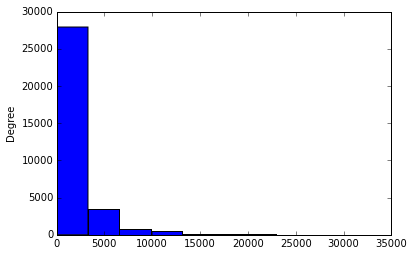

In [185]:
# Shapiro-Wilk Test - Test to determine likliehood that the sample is drawn from a normally distributed population.
print 'Perform Shapiro-Wilk Test to determine if its parametric:'
w, p = scipy.stats.shapiro(tsNoRain)
print 'Test Stat: ',w,'\n','p-Value: ',p
print 'The p-value suggests that there is a 0% likelihood that we would observe a Shapiro Test Statistic as extreme as that, therefore confirming the data is not drawn from a normally distributed population.  In conclusion, we cannot utilize a t-test for comparing the samples, and must use some non-parametric test.'

# Because the distribution of the turnstile data is non-normal (see below), we will not perform a t-test 
# (which can only be used on normally distributed data). 
print '\nHistogram of data (no rain subset):'
print tsNoRain.plot(kind='hist')

#### 1.3 What results did you get from this statistical test? These should include the following numerical values: p-values, as well as the means for each of the two samples under test.
Below please find the code and results from the Mann-Whitney U Test, commentary provided where necessary.

In [186]:
# Perform Statistical Test - Mann-Whitney U Test

# Perform the Mann-Whitney U Test
# Returns the one-sided p-value and U Statistic
(U,p) = scipy.stats.mannwhitneyu(tsNoRain,tsRain)
# Third - Calculate the means for each series
mean_noRain = tsNoRain.mean()
mean_Rain = tsRain.mean()

# Handle the Results from the Scipy test - Multiple by 2 for two-tailed test (scipy test returns one-tailed)
p_value = 2*p

print 'Mann-Whitney Test Results: '
print 'Test statistic: ',U,'\np-Value: ',p_value, '\nNo Rain - Mean Entries: ',mean_noRain,'\nRain - Mean Entries: ', mean_Rain

Mann-Whitney Test Results: 
Test statistic:  153635120.5 
p-Value:  5.48213914249e-06 
No Rain - Mean Entries:  1845.53943866 
Rain - Mean Entries:  2028.19603547


#### Descriptive Statistics for the two samples: 

In [187]:
print 'Rain: \n', tsRain.describe(), '\n'
print 'No Rain: \n', tsNoRain.describe()

Rain: 
count     9585.000000
mean      2028.196035
std       3189.433373
min          0.000000
25%        295.000000
50%        939.000000
75%       2424.000000
max      32289.000000
Name: entriesn_hourly, dtype: float64 

No Rain: 
count    33064.000000
mean      1845.539439
std       2878.770848
min          0.000000
25%        269.000000
50%        893.000000
75%       2197.000000
max      32814.000000
Name: entriesn_hourly, dtype: float64


#### 1.4 What is the significance and interpretation of these results?
Mann-Whitney U is significant if the p-value obtained is LESS THAN or equal to the p critical value.  In this case, the p-value, 0.00000548213, is much smaller than the critical value we chose, 0.05, and therefore we can reject the null hypothesis.  Therefore, one might conclude that the mean of the entries when raining, is indeed greater than the mean of entries when there is no rain.  Meaning that when it rains, turnstile entries tend to increase as people prefer the subway, rather than walking above ground (IN THE RAIN!).

## Section 2. Linear Regression

In [188]:
# Linear Regression (In Notebook)
# Setup the data
features = ts[['meanprecipi','rain','hour','meanwspdi','meantempi','day_week']]
dummy_conds = pd.get_dummies(ts['conds'], prefix='cnd') # Split out the 'conds' conditions column.
dummy_conds_cols = dummy_conds.columns
##['cnd_Clear', 'cnd_Fog', 'cnd_Haze', 'cnd_Heavy Rain','cnd_Light Drizzle', 'cnd_Light Rain', 'cnd_Mist','cnd_Mostly Cloudy', 'cnd_Overcast', 'cnd_Partly Cloudy','cnd_Rain', 'cnd_Scattered Clouds']
dummy_conds = dummy_conds[['cnd_Mist','cnd_Mostly Cloudy', 'cnd_Overcast','cnd_Clear', 'cnd_Fog', 'cnd_Haze', 'cnd_Heavy Rain','cnd_Light Drizzle', 'cnd_Light Rain', 'cnd_Partly Cloudy','cnd_Rain', 'cnd_Scattered Clouds']]

dummy_units = pd.get_dummies(ts['unit'], prefix='unit') # Split out the 'units'.
features = features.join(dummy_conds) # Add in the dummy conditions field
features = features.join(dummy_units) # Add in the dummy units field
del features['unit_R181'] # Delete one of the columns to avoid summing to 1.
features = sm.add_constant(features) # Add a constant value
values = ts.entriesn_hourly # Create a series with the predictor values. 

model = sm.OLS(values, features)
results = model.fit()
res_summary = results.summary()
intercept = results.params[0]
params = results.params[1:]

print res_summary
#print res_summary,'\nIntercept: ',intercept,'\nParameters',params


                            OLS Regression Results                            
Dep. Variable:        entriesn_hourly   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     151.4
Date:                Wed, 07 Oct 2015   Prob (F-statistic):               0.00
Time:                        20:53:50   Log-Likelihood:            -3.8745e+05
No. Observations:               42649   AIC:                         7.754e+05
Df Residuals:                   42392   BIC:                         7.776e+05
Df Model:                         256                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
const                 2522.0463 

#### 2.1 What approach did you use to compute the coefficients theta and produce prediction for ENTRIESn_hourly in your regression model:
Utilized OLS using Statsmodels.

#### 2.2 What features (input variables) did you use in your model? Did you use any dummy variables as part of your features?
I experimented quite a bit and settled on doing the following: 
- Dummy'ing the 'unit' variable (and excluding 1 item)
- Dummy'ing the 'conds' variable 
- Including the following variables: 'meanprecipi','rain','hour','meanwspdi','meantempi','precipi','day_week'

#### 2.3 Why did you select these features in your model? We are looking for specific reasons that lead you to believe that the selected features will contribute to the predictive power of your model. Your reasons might be based on intuition. For example, response for fog might be: “I decided to use fog because I thought that when it is very foggy outside people might decide to use the subway more often.” Your reasons might also be based on data exploration and experimentation, for example: “I used feature X because as soon as I included it in my model, it drastically improved my R2 value.”  
Most of my features selection are based upon two things: 1) Intuition, and 2) Trial-and-Error through review of the R2 value.  Here is a breakdown:
- meanprecipi / rain / meanwspdi: all of these are items that I firmly believed would have some legitimate impact on someone's choice to utilize the subway.  That is, the more wind / rain, the more likely a person may be to dive down into a subway station for transport. 'precipi' not included because it did not increase my R2, despite my intuition that precipitation is one of the basics to why persons would choose subway or not (i.e., walking)). However, upon further investigation, I believe that my other feature, 'meanprecipi' is sufficient AND a more ideal feature (this was tested exclusively and the 'meanprecipi' prevailed in R2 augmentation). 
- hour / day_week / unit: Included as these have a signficant conditional impact to the number of entries, regardless of the conditions.  For example, the hour of the day varies widely between 3am (early morning) and 8am (commute), and entries are, of course, more significant at peak hours.  I reviewed the results without the 'hour' variable and there is a STEEP decrease in R2 (roughly .1).
- 'cond_xxxx' features: These varibles were dummied and added as features, as I experimented with the impact on the R2.  Of particular note was that removal of cond_fog and cond-haze each decreased R2 (whereas I was surprised considering the lack of connection to taking the subway, in my opinion).  The other thing that should be noted is the lack of significance (p-value) for: 'cnd_Mist','cnd_Mostly Cloudy', 'cnd_Overcast'.  However removal did not improve R2.

#### 2.4 What are the parameters (also known as "coefficients" or "weights") of the non-dummy features in your linear regression model?
Refer to the above answer for greater detail on the following: 
meanprecipi
rain
hour
day_week
meanwspdi
meantempi

#### 2.5 What is your model’s R2 (coefficients of determination) value?
0.478

#### 2.6 What does this R2 value mean for the goodness of fit for your regression model? 
The R2 value is a measure of how close the data are to the fitted regression line (i.e., Residual = Observed Value - Fitted Value), therefore the closer the fit, the better the R2. Overall, roughly 50% of the variability of the response data around its mean is explained by the model.  

#### Do you think this linear model to predict ridership is appropriate for this dataset, given this R2  value?
While the R2 is not necessarily very high, this does not mean that the linear model is inadequate.  In this case, I believe there are many variables that may impact a the number of hourly entries, and further analysis (i.e., longer time period) might be necessary to draw conclusions.  There seem to be a limited number of additional variables (features) that can influence the dependent variable (entries).  Overall, I do believe that this linear model is sufficient for this dataset.  

### Section 3. Visualization

### Please include two visualizations that show the relationships between two or more variables in the NYC subway data.
#### Remember to add appropriate titles and axes labels to your plots. Also, please add a short description below each figure commenting on the key insights depicted in the figure.

#### 3.1 One visualization should contain two histograms: one of  ENTRIESn_hourly for rainy days and one of ENTRIESn_hourly for non-rainy days.
##### -You can combine the two histograms in a single plot or you can use two separate plots.
##### -If you decide to use to two separate plots for the two histograms, please ensure that the x-axis limits for both of the plots are identical. It is much easier to compare the two in that case.
##### -For the histograms, you should have intervals representing the volume of ridership (value of ENTRIESn_hourly) on the x-axis and the frequency of occurrence on the y-axis. For example, each interval (along the x-axis), the height of the bar for this interval will represent the number of records (rows in our data) that have ENTRIESn_hourly that falls in this interval.
##### -Remember to increase the number of bins in the histogram (by having larger number of bars). The default bin width is not sufficient to capture the variability in the two samples.

Plot #1 - Histogram of Entries (Rain and Non-Rain Days)


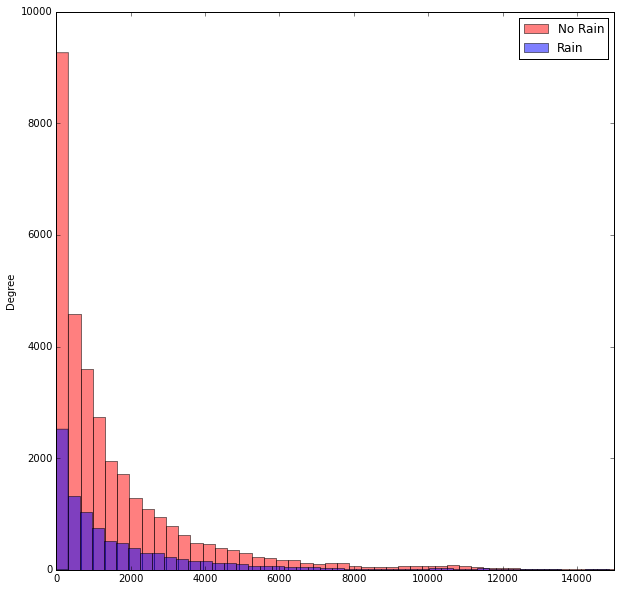

In [197]:
print 'Plot #1 - Histogram of Entries (Rain and Non-Rain Days)'
rain = ts[ts['rain']==1]['entriesn_hourly']
no_rain = ts[ts['rain']==0]['entriesn_hourly']
ax = no_rain.plot(kind='hist', bins = 100, alpha = .5, color = 'red',label = 'No Rain',xlim = (0,15000),figsize = (10,10))
ax = rain.plot(kind='hist', bins = 100, alpha = .5, color = 'blue',label = 'Rain',xlim = (0,15000),figsize = (10,10))
#ax.set_xlabel('Histogram of Entries Values ')
ax.legend()

#### 3.2 One visualization can be more freeform. You should feel free to implement something that we discussed in class (e.g., scatter plots, line plots) or attempt to implement something more advanced if you'd like. Some suggestions are: 
Ridership by time-of-day
Ridership by day-of-week

Ridership by time-of-day:
Caption: As you can see, the subway is very active from 8am to 12, the morning commute, when it dips slightly after lunch, before taking off again for the evening commute.


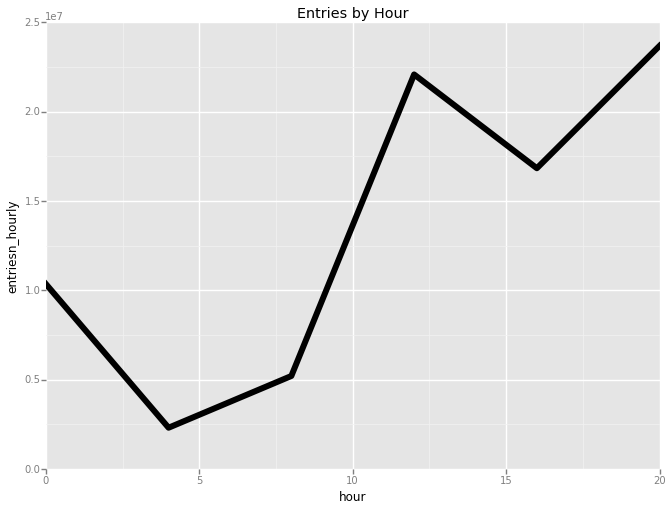

<ggplot: (291367041)>

In [190]:
print 'Ridership by time-of-day:'
df1 = ts[['entriesn_hourly','hour','rain']]
df2 = df1.groupby(['hour','rain']).sum().reset_index()
df_totals = df2.groupby('hour').sum().reset_index()

print 'Caption: As you can see, the subway is very active from 8am to 12, the morning commute, when it dips slightly after lunch, before taking off again for the evening commute.'

ggplot(df_totals,aes('hour','entriesn_hourly')) + geom_line(size = 6) + ggtitle('Entries by Hour')

# Others that didn't make much sense.
#ggplot(df2,aes('hour','entriesn_hourly',color = 'rain')) + geom_line(size = 6) + ggtitle('Entries by Hour')
#plot = ggplot(df2,aes('hour','entriesn_hourly')) + geom_line(size = 6) + stat_smooth
#plot = ggplot() + geom_line(df2,aes('hour','entriesn_hourly',color='rain')) #+ geom_line(df_totals,aes('hour','entriesn_hourly'))

Ridership by day-of-week (Mon-Sun):
Caption: As you can see, the subway is very active from Monday thorugh Friday, with Tuesday being the most active day of the week, before dipping significantly on the weekend.


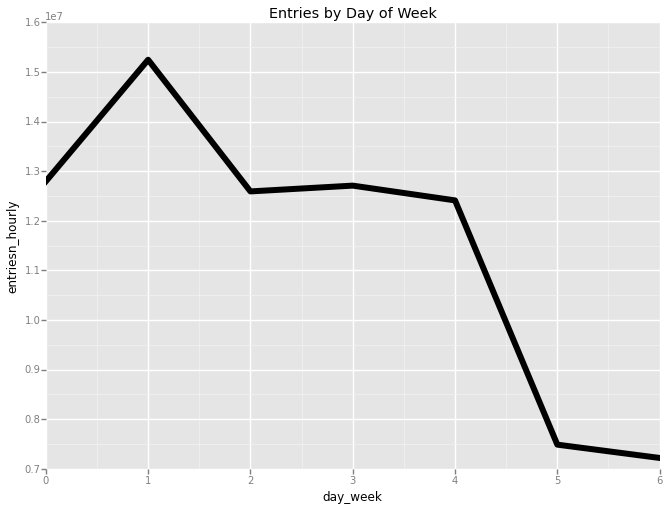

<ggplot: (293580369)>

In [191]:
print 'Ridership by day-of-week (Mon-Sun):'
df1 = ts[['entriesn_hourly','day_week','rain']]
df2 = df1.groupby(['day_week','rain']).sum().reset_index()
df_totals = df2.groupby('day_week').sum().reset_index()

print 'Caption: As you can see, the subway is very active from Monday thorugh Friday, with Tuesday being the most active day of the week, before dipping significantly on the weekend.'

ggplot(df_totals,aes('day_week','entriesn_hourly')) + geom_line(size = 6) + ggtitle('Entries by Day of Week')

### Section 4. Conclusion

#### Please address the following questions in detail. Your answers should be 1-2 paragraphs long.
#### 4.1 From your analysis and interpretation of the data, do more people ride the NYC subway when it is raining or when it is not raining?
When it is raining.  Please review 4.2 (addressed and explained in-depth).
#### 4.2 What analyses lead you to this conclusion? You should use results from both your statistical tests and your linear regression to support your analysis.
Its clear that there is more ridership when its raining or the conditions outside are poor.  The way I support this conclusion is : 
* Mann-Whitney U Test - As shown above, the results of the test on two subsets of data (raining vs. not-raining) led us to reject the null hypothesis, which was that both samples essentially come from the same population.  The alternative, that one population tends to be greater, is accepted (as the p-value is less than our set significance level).  When reviewing the descriptive statistics (produced by the describe() function) we can clearly come to some conclusions: 
 * First, there are far fewer records for the "Rain" subset, which makes sense, even though its May in NYC (spring).  Obviously there are more times where its not raining than raining (in the 4 hour increments).
 * The mean entries is greater for "Rain" subset (2028 vs. 1845), suggesting that entries increase when its raining.  
 * The median entries is greater for "Rain" subset (939 vs. 893), which essentially confirms what the mean told us (but with better control in case there was a significant outlier in one of the subsets).
* Linear Regression - Using linear regression was a valuable way to understand the variables that contribute to the increase or decrease of entries.  Upon review of the "OLS Regression Results" (model achieved an R-Squared of 0.478) we better understand what affects entries.  Here are some key points: 
 * The "meanprecipi" variable has an affect on entries - though not as much as it appears.  The coefficient is 7254, referencing a whole 1 inch of rain (which is alot of rain in any four hour period).  Regardless, the more precipition, the more people prefer to ride the subway (as opposed to walking).
 * The "Rain" variable coefficient value is 110 - meaning that when this binary variable is increased from 0 to 1, the entries increase by 110, supporting the case that rain causes more people to seek subway transportation. 
 * The variables created from the conditions field are interesting.  First, "cnd_Heavy Rain", "cnd_Rain" and "cnd_Light Drizzle" is modeled such that if there is rain / drizzle - there is a decrease in ridership.  Isn't that weird?  Well, I believe it might be due to people not riding or walking if the conditions are such (possibly waiting it out and contributing their entry in a later period, where the conditions may have turned to mostly cloudy / etc.).  However, I am generally confounded because "cnd_Light Rain", which is presumably the difference between Rain and Light Drizzle, doesn't conform in the same way, in that the ridership increases.   
* Visualization - Visualization helps us analyze the trend in a way that the brain can generally make more sense of.  The dual histogram showing the frequencies of the values is interesting but doesn't support my conclusion, which I believe is solely due to the disparity in record counts - because there are so many more periods for non-rain than there is for rain.  The other visualizations helped me better understand the data (by day / by hour), irrespective of rain consideration.

Overall, I will confidently conclude that ridership increases in rain (or poor conditions for that matter).

### Section 5. Reflection

#### Please address the following questions in detail. Your answers should be 1-2 paragraphs long.
#### 5.1 Please discuss potential shortcomings of the methods of your analysis, including: Dataset, Analysis, such as the linear regression model or statistical test.
#### 5.1 Please discuss potential shortcomings of the methods of your analysis, including: Dataset, Analysis, such as the linear regression model or statistical test.

There are certainly shortcomings with many of the methods used - which is the reason why it is important to perform varying forms of analysis (such as statistical analysis and regression).  I will address the items most important / noticable to me below:
* Dataset 
 * The data is in transactional form at a 4 hour increment level.  This is good AND bad.  While we prefer to have aggregated data for simplicity and ease of handling, this clouds (no PUN intended) the accuracy of our analysis, as 4 hours is a significant period of time to group together especially with weather (e.g., its raining from 8am to 9am, but sunny from 9am to noon).  More detailed information would be preferred (maybe at the 30-min to 1-hr increment).
 * The "rain" variable is ambiguous, in that its a binary variable for if rain occurred during the DAY for that location.  This is not a very good indicator when we are looking at the data in 4 hour increments (i.e., it would be better if the indicator referred to that 4-hour period).  
* Analysis
 * Our analysis does not consider extraneous factors (various events, etc. that have impacted the flow of movement). For example, what if Madison Square Garden was very active during the month due to the Knicks and Rangers being in playoff contention during the period.  There might be more traffic by subway into the city no matter the condition.  If looking at this data in more depth, we might consider trying to eliminate any periods that might be affected by events. 
 * The linear regression model did not achieve a high R2 value.  This  does not necessarily mean the model is inadequate, but it does cast some doubt on the contributions of the independent variables within the model.
 
#### 5.2 (Optional) Do you have any other insight about the dataset that you would like to share with us?

Honestly, I am not one to leave an optional question blank, but I was very thorough above.  